### <center> The "Absenteeism dataset with synthetic data </center>

Load the data. The dataset has been balanced with synthetic data. The original data has 740 rows. The balanced dataset has 1061 rows.

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_eec11136200e4572b8948b056fee73e9.csv"
df=pd.read_csv(url)
df.head()

,reason_for_absence,month_of_absence,day_of_absence,season,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absenteeism_time_category
0,0,0,6,3,179,45,14,53,271.219,95,...,1,1,0,0,1,77,175,25,0,0
1,18,12,3,2,155,12,14,34,280.549,98,...,1,2,1,0,0,95,196,25,80,6
2,0,3,5,3,235,11,14,37,244.387,98,...,3,1,0,0,1,88,172,29,0,0
3,19,3,2,3,289,36,13,33,222.196,99,...,1,2,1,0,1,90,172,30,104,6
4,0,9,3,4,118,13,18,50,241.476,92,...,1,1,1,0,0,98,178,31,0,0


In [2]:
df.shape

(1061, 21)

In [3]:
X=df.drop(["reason_for_absence","absenteeism_time_in_hours","absenteeism_time_category"],axis=1)
X.head()

,month_of_absence,day_of_absence,season,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,0,6,3,179,45,14,53,271.219,95,0,1,1,0,0,1,77,175,25
1,12,3,2,155,12,14,34,280.549,98,0,1,2,1,0,0,95,196,25
2,3,5,3,235,11,14,37,244.387,98,1,3,1,0,0,1,88,172,29
3,3,2,3,289,36,13,33,222.196,99,0,1,2,1,0,1,90,172,30
4,9,3,4,118,13,18,50,241.476,92,1,1,1,1,0,0,98,178,31


In [8]:
X.shape

(1061, 18)

In [4]:
y=df[["absenteeism_time_category"]]
y.head()

,absenteeism_time_category
0,0
1,6
2,0
3,6
4,0


Standardize X.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
names=X.columns
X=pd.DataFrame(scaler.fit_transform(X),columns=names)
X.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month_of_absence,day_of_absence,season,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,-1.861757,1.570496,0.332860,-0.648292,1.128852,0.313983,2.372251,-0.086127,0.168157,-0.419851,-0.400387,-0.080735,-1.225707,-0.289411,0.214898,-0.211134,0.446296,-0.424775
1,1.629243,-0.562136,-0.568071,-0.995115,-1.146332,0.313983,-0.454789,0.146856,0.887568,-0.419851,-0.400387,0.830537,0.815855,-0.289411,-0.563282,1.154337,3.874051,-0.424775
2,-0.989007,0.859619,0.332860,0.160963,-1.215277,0.313983,-0.008414,-0.756158,0.887568,2.381797,2.734745,-0.080735,-1.225707,-0.289411,0.214898,0.623321,-0.043383,0.486163
3,-0.989007,-1.273013,0.332860,0.941316,0.508347,0.067033,-0.603581,-1.310297,1.127372,-0.419851,-0.400387,0.830537,0.815855,-0.289411,0.214898,0.775040,-0.043383,0.713898
4,0.756493,-0.562136,1.233792,-1.529802,-1.077387,1.301786,1.925877,-0.828849,-0.551255,2.381797,-0.400387,-0.080735,0.815855,-0.289411,-0.563282,1.381916,0.935975,0.941632


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_samples=y.shape[0]
y=np.asarray(y).reshape(n_samples,)

estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(5),scoring="accuracy")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)


Optimal number of features : 18


<Figure size 640x480 with 1 Axes>

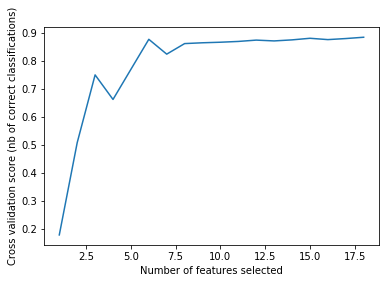

In [7]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

The optimal number of features is 18. So, we need all the features in the predictor set X.

Split X (the predictors) and y (the target) into train and test subsets.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(848, 18)
(213, 18)


In [10]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [12]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verb

In [13]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [14]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y_pred))

Accuracy on test data is:  0.9577464788732394


In [15]:
from sklearn.metrics import classification_report
print("Classification report on test data: \n",classification_report(y_test,y_pred))

Classification report on test data: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       0.98      0.94      0.96       124
           2       0.78      1.00      0.88         7
           3       0.93      0.93      0.93        15
           4       1.00      1.00      1.00        11
           5       0.50      1.00      0.67         1
           6       0.86      0.92      0.89        13

   micro avg       0.96      0.96      0.96       213
   macro avg       0.86      0.97      0.90       213
weighted avg       0.96      0.96      0.96       213



Not bad. The model is particularly sensitive to employees who would be absent for 4 days or less. It also has a decent sensitivity to employees who would be absent for 6 days or more.